In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq
import random
import time
import numpy as np

def generate_graph(num_nodes, density):
    """Generates a connected graph based on the number of nodes and density."""
    graph = nx.Graph()
    graph.add_nodes_from(range(num_nodes))

    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if random.random() < density:
                weight = random.randint(1, 10)
                graph.add_edge(i, j, weight=weight)

    # Ensure the graph is connected
    if not nx.is_connected(graph):
        return generate_graph(num_nodes, density)

    return graph

def generate_negative_weight_graph(num_nodes, density):
    """Generates a connected graph based on the number of nodes and density."""
    graph = nx.Graph()
    graph.add_nodes_from(range(num_nodes))

    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if random.random() < density:
                weight = random.randint(-10, 10)
                graph.add_edge(i, j, weight=weight)

    # Ensure the graph is connected
    if not nx.is_connected(graph):
        return generate_graph(num_nodes, density)

    return graph

def prim_mst(graph):
    """Finds the MST of a graph using Prim's algorithm and returns the MST with its total weight."""
    start_time = time.time()
    # Priority queue to keep track of edges with the lowest weight
    edge_pq = []
    # Start with an arbitrary node, here node 0
    start_node = list(graph.nodes())[0]
    # Set to keep track of visited nodes
    visited = set([start_node])
    # Add all adjacent edges to the priority queue
    for u, v, weight in graph.edges(start_node, data='weight'):
        heapq.heappush(edge_pq, (weight, start_node, v))

    mst = nx.Graph()
    mst.add_node(start_node)
    total_weight = 0

    # Process edges with the lowest weight first
    while edge_pq and len(mst.nodes) < len(graph.nodes):
        weight, u, v = heapq.heappop(edge_pq)
        if v not in visited:
            visited.add(v)
            mst.add_edge(u, v, weight=weight)
            total_weight += weight
            # Add all new edges from the newly added node
            for next_node, data in graph[v].items():
                if next_node not in visited:
                    heapq.heappush(edge_pq, (data['weight'], v, next_node))
    elapsed_time = time.time() - start_time
    return mst, total_weight, elapsed_time

def kruskal_mst(graph):
    """Finds the minimum spanning tree of a graph using Kruskal's algorithm."""
    start_time = time.time()
    mst = nx.Graph()
    edges = sorted(graph.edges(data=True), key=lambda x: x[2]['weight'])

    # Initialize parent and rank for Union-Find
    parent = {node: node for node in graph.nodes()}
    rank = {node: 0 for node in graph.nodes()}

    def find(node):
        if parent[node] != node:
            parent[node] = find(parent[node])
        return parent[node]

    def union(node1, node2):
        root1 = find(node1)
        root2 = find(node2)
        if root1 != root2:
            if rank[root1] > rank[root2]:
                parent[root2] = root1
            elif rank[root1] < rank[root2]:
                parent[root1] = root2
            else:
                parent[root2] = root1
                rank[root1] += 1

    for u, v, weight in edges:
        if find(u) != find(v):
            mst.add_edge(u, v, weight=weight['weight'])
            union(u, v)
            if len(mst.nodes) == graph.number_of_nodes():
                break

    total_weight = sum(data['weight'] for u, v, data in mst.edges(data=True))
    elapsed_time = time.time() - start_time
    return mst, total_weight, elapsed_time

Test the Prims and Kruskals algorithm with sparse graphs

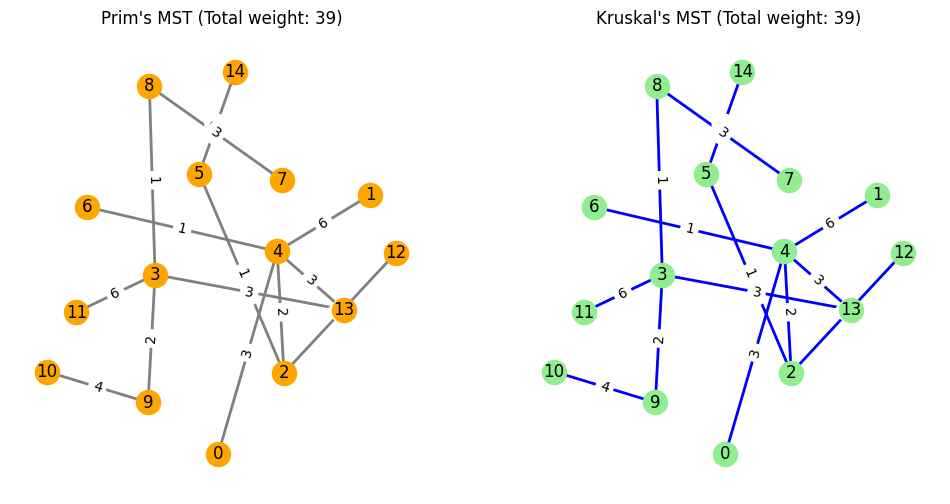

In [ ]:
# Generate graph and find MST using Prim's algorithm
num_nodes = 15
density = 0.3
graph = generate_graph(num_nodes, density)
mst_prim, total_weight_prim = prim_mst(graph)
mst_kruskal, total_weight_kruskal = kruskal_mst(graph)

# Plotting the results
pos = nx.spring_layout(graph)
plt.figure(figsize=(12, 6))

# Plotting the original graph
plt.subplot(121)
nx.draw(mst_prim, pos, with_labels=True, node_color='orange', edge_color='gray', width=2)
edge_labels = nx.get_edge_attributes(mst_prim, 'weight')
nx.draw_networkx_edge_labels(mst_prim, pos, edge_labels=edge_labels)
plt.title(f"Prim's MST (Total weight: {total_weight_prim})")

# Plotting the MST produced by Prim's algorithm
plt.subplot(122)
nx.draw(mst_kruskal, pos, with_labels=True, node_color='lightgreen', edge_color='blue', width=2)
edge_labels = nx.get_edge_attributes(mst_kruskal, 'weight')
nx.draw_networkx_edge_labels(mst_kruskal, pos, edge_labels=edge_labels)
plt.title(f"Kruskal's MST (Total weight: {total_weight_kruskal})")
plt.show()

Test the Prims and Kruskals algorithm with dense graphs

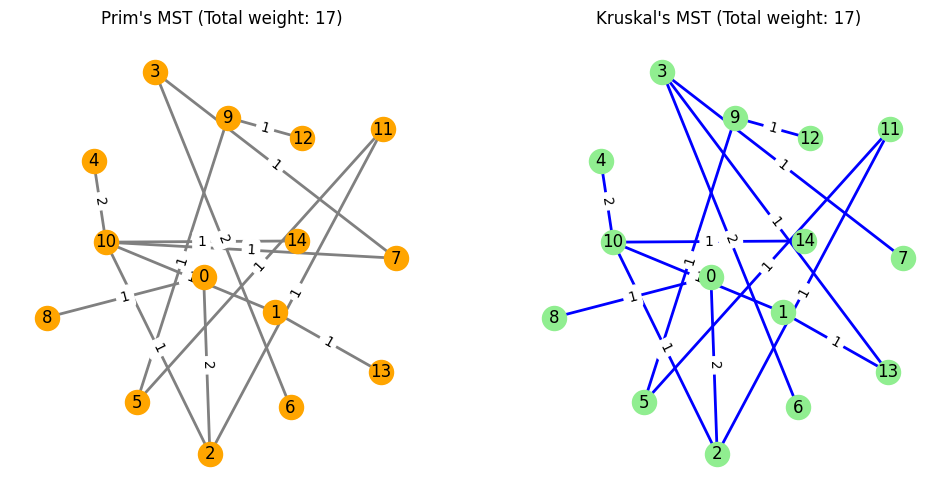

In [ ]:
# Generate graph and find MST using Prim's algorithm
num_nodes = 15
density = 0.9
graph = generate_graph(num_nodes, density)
mst_prim, total_weight_prim = prim_mst(graph)
mst_kruskal, total_weight_kruskal = kruskal_mst(graph)

# Plotting the results
pos = nx.spring_layout(graph)
plt.figure(figsize=(12, 6))

# Plotting the original graph
plt.subplot(121)
nx.draw(mst_prim, pos, with_labels=True, node_color='orange', edge_color='gray', width=2)
edge_labels = nx.get_edge_attributes(mst_prim, 'weight')
nx.draw_networkx_edge_labels(mst_prim, pos, edge_labels=edge_labels)
plt.title(f"Prim's MST (Total weight: {total_weight_prim})")

# Plotting the MST produced by Prim's algorithm
plt.subplot(122)
nx.draw(mst_kruskal, pos, with_labels=True, node_color='lightgreen', edge_color='blue', width=2)
edge_labels = nx.get_edge_attributes(mst_kruskal, 'weight')
nx.draw_networkx_edge_labels(mst_kruskal, pos, edge_labels=edge_labels)
plt.title(f"Kruskal's MST (Total weight: {total_weight_kruskal})")
plt.show()

Test the Prims and Kruskals algorithm with varying edge weights

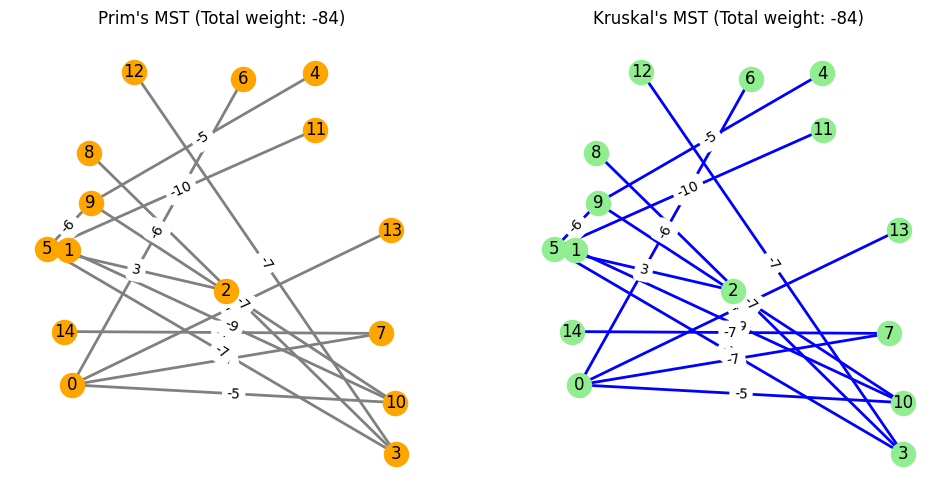

In [ ]:
# Generate graph and find MST using Prim's algorithm
num_nodes = 15
density = 0.5
graph = generate_negative_weight_graph(num_nodes, density)
mst_prim, total_weight_prim = prim_mst(graph)
mst_kruskal, total_weight_kruskal = kruskal_mst(graph)

# Plotting the results
pos = nx.spring_layout(graph)
plt.figure(figsize=(12, 6))

# Plotting the original graph
plt.subplot(121)
nx.draw(mst_prim, pos, with_labels=True, node_color='orange', edge_color='gray', width=2)
edge_labels = nx.get_edge_attributes(mst_prim, 'weight')
nx.draw_networkx_edge_labels(mst_prim, pos, edge_labels=edge_labels)
plt.title(f"Prim's MST (Total weight: {total_weight_prim})")

# Plotting the MST produced by Prim's algorithm
plt.subplot(122)
nx.draw(mst_kruskal, pos, with_labels=True, node_color='lightgreen', edge_color='blue', width=2)
edge_labels = nx.get_edge_attributes(mst_kruskal, 'weight')
nx.draw_networkx_edge_labels(mst_kruskal, pos, edge_labels=edge_labels)
plt.title(f"Kruskal's MST (Total weight: {total_weight_kruskal})")
plt.show()

Measure Prims and Kruskal performance of tme complexity with changed density

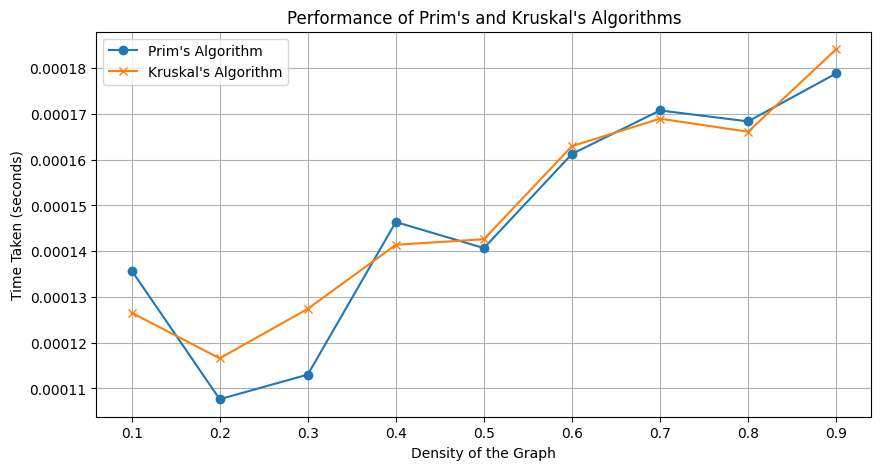

In [ ]:
# Test performance over a range of densities
densities = [i / 10 for i in range(1, 10)]
prim_avg_times = []
kruskal_avg_times = []

for density in densities:
    prim_times = []
    kruskal_times = []
    for _ in range(100):  # Loop 100 times for each density
        graph = generate_graph(15, density)
        mst_prim, total_weight_prim, prim_time = prim_mst(graph)
        mst_kruskal, total_weight_kruskal, kruskal_time = kruskal_mst(graph)
        prim_times.append(prim_time)
        kruskal_times.append(kruskal_time)
    # Calculate average time for each density
    prim_avg_times.append(np.mean(prim_times))
    kruskal_avg_times.append(np.mean(kruskal_times))

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(densities, prim_avg_times, marker='o', label='Prim\'s Algorithm')
plt.plot(densities, kruskal_avg_times, marker='x', label='Kruskal\'s Algorithm')
plt.xlabel('Density of the Graph')
plt.ylabel('Time Taken (seconds)')
plt.title('Performance of Prim\'s and Kruskal\'s Algorithms')
plt.legend()
plt.grid(True)
plt.show()

Measure Prims and Kruskal performance of total weights with changed density

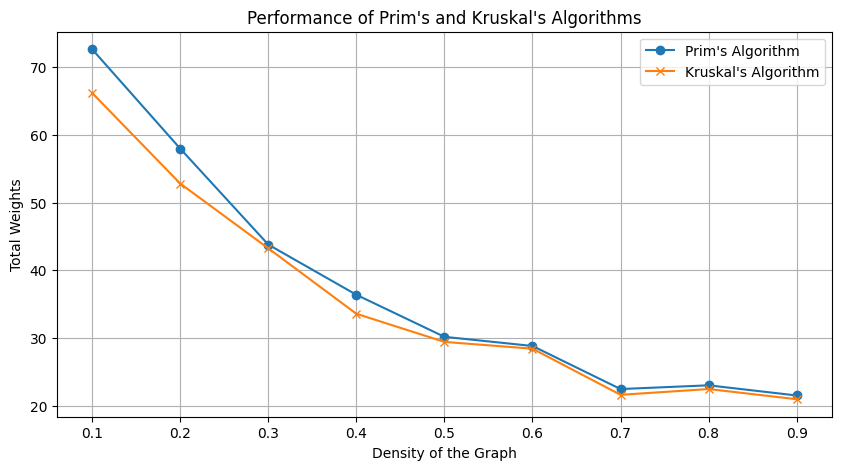

In [ ]:
# Test performance over a range of densities
densities = [i / 10 for i in range(1, 10)]
prim_avg_weights = []
kruskal_avg_weights = []

for density in densities:
    prim_weights = []
    kruskal_weights = []
    for _ in range(20):  # Loop 20 times for each density
        graph = generate_graph(15, density)
        mst_prim, total_weight_prim, prim_time = prim_mst(graph)
        mst_kruskal, total_weight_kruskal, kruskal_time = kruskal_mst(graph)
        prim_weights.append(total_weight_prim)
        kruskal_weights.append(total_weight_kruskal)
    # Calculate average time for each density
    prim_avg_weights.append(np.mean(prim_weights))
    kruskal_avg_weights.append(np.mean(kruskal_weights))

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(densities, prim_avg_weights, marker='o', label='Prim\'s Algorithm')
plt.plot(densities, kruskal_avg_weights, marker='x', label='Kruskal\'s Algorithm')
plt.xlabel('Density of the Graph')
plt.ylabel('Total Weights')
plt.title('Performance of Prim\'s and Kruskal\'s Algorithms')
plt.legend()
plt.grid(True)
plt.show()

Measure Prims and Kruskal performance of time taken with negative weights

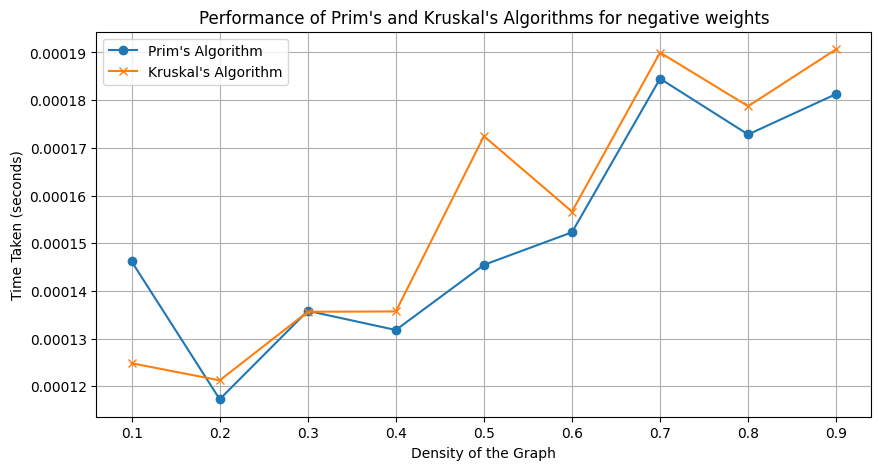

In [ ]:
# Test performance over a range of densities
densities = [i / 10 for i in range(1, 10)]
prim_avg_times = []
kruskal_avg_times = []

for density in densities:
    prim_times = []
    kruskal_times = []
    for _ in range(20):  # Loop 20 times for each density
        graph = generate_negative_weight_graph(15, density)
        mst_prim, total_weight_prim, prim_time = prim_mst(graph)
        mst_kruskal, total_weight_kruskal, kruskal_time = kruskal_mst(graph)
        prim_times.append(prim_time)
        kruskal_times.append(kruskal_time)
    # Calculate average time for each density
    prim_avg_times.append(np.mean(prim_times))
    kruskal_avg_times.append(np.mean(kruskal_times))

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(densities, prim_avg_times, marker='o', label='Prim\'s Algorithm')
plt.plot(densities, kruskal_avg_times, marker='x', label='Kruskal\'s Algorithm')
plt.xlabel('Density of the Graph')
plt.ylabel('Time Taken (seconds)')
plt.title('Performance of Prim\'s and Kruskal\'s Algorithms for negative weights')
plt.legend()
plt.grid(True)
plt.show()

Measure Prims and Kruskal performance of total weights with negative weights

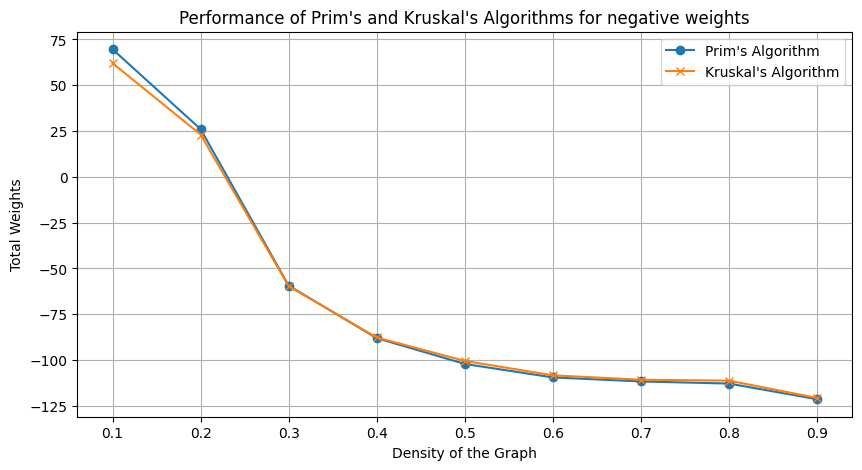

In [ ]:
# Test performance over a range of densities
densities = [i / 10 for i in range(1, 10)]
prim_avg_weights = []
kruskal_avg_weights = []

for density in densities:
    prim_weights = []
    kruskal_weights = []
    for _ in range(20):  # Loop 20 times for each density
        graph = generate_negative_weight_graph(15, density)
        mst_prim, total_weight_prim, prim_time = prim_mst(graph)
        mst_kruskal, total_weight_kruskal, kruskal_time = kruskal_mst(graph)
        prim_weights.append(total_weight_prim)
        kruskal_weights.append(total_weight_kruskal)
    # Calculate average time for each density
    prim_avg_weights.append(np.mean(prim_weights))
    kruskal_avg_weights.append(np.mean(kruskal_weights))

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(densities, prim_avg_weights, marker='o', label='Prim\'s Algorithm')
plt.plot(densities, kruskal_avg_weights, marker='x', label='Kruskal\'s Algorithm')
plt.xlabel('Density of the Graph')
plt.ylabel('Total Weights')
plt.title('Performance of Prim\'s and Kruskal\'s Algorithms for negative weights')
plt.legend()
plt.grid(True)
plt.show()